# Reading in data

In [60]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import clone
from sklearn.metrics import make_scorer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [5]:
CURRENT_DIR = os.getcwd()
X_DIR = CURRENT_DIR + "\\data\\data_X.csv"
Y_DIR = CURRENT_DIR + "\\data\\data_Y.csv"

X = pd.read_csv(X_DIR)
y = pd.read_csv(Y_DIR).squeeze().ravel()

print(X.shape)
print(y.shape)

(4000, 12)
(4000,)


# Model Selection - Different layers

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming you have your X, y data loaded before this point

# Define preprocessing steps for numerical and categorical features
numeric_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['X7', 'X8', 'X9', 'X10', 'X11', 'X12']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine numerical and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

def evaluate_model(model, MODEL_NAME, results_df, features):
    # Create the full pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', model)])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.2, random_state=42)

    # Fit the pipeline on the training data
    # Specify epochs and batch_size in the fit method
    pipeline.fit(X_train, y_train, model__epochs=300, model__batch_size=32, model__verbose=0)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model on the test set
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Temporarily suppress FutureWarnings during concatenation
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", FutureWarning)

        # Create a new DataFrame with the results
        new_results_df = pd.DataFrame({'MODEL_NAME': [MODEL_NAME], 'MAE': [mae], 'MSE': [mse], 'R2': [r2]})

        # Concatenate the new results DataFrame with the existing results_df
        if results_df is None:
            results_df = new_results_df
        else:
            results_df = pd.concat([results_df, new_results_df], ignore_index=True)

    print(f'{MODEL_NAME} is done training and evaluation')

    return results_df


In [50]:
results_df = pd.DataFrame(columns=['MODEL_NAME', 'MAE', 'MSE', 'R2'])

In [53]:
full_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6','X7', 'X8', 'X9', 'X10', 'X11', 'X12']

model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

results_df = evaluate_model(model, "Two Layers ANN Model", results_df, full_features)

model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu', input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

results_df = evaluate_model(model, "Three Layers ANN Model", results_df, full_features)

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

results_df = evaluate_model(model, "Two Layers ANN Model with 64", results_df, full_features)

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu', input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

results_df = evaluate_model(model, "Three Layers ANN Model with 64", results_df, full_features)

model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=35))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

results_df = evaluate_model(model, "Two Layers ANN Model with 0,3 drop", results_df, full_features)

25/25 [==============================] - 0s 1ms/step
Two Layers ANN Model is done training and evaluation


C:\Users\jonas\AppData\Local\Temp\ipykernel_23180\1206830518.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({'MODEL_NAME': [MODEL_NAME], 'MAE': [mae], 'MSE': [mse], 'R2': [r2]})], ignore_index=True)


25/25 [==============================] - 0s 1ms/step
Three Layers ANN Model is done training and evaluation
25/25 [==============================] - 0s 1ms/step
Two Layers ANN Model with 64 is done training and evaluation
25/25 [==============================] - 0s 1ms/step
Three Layers ANN Model with 64 is done training and evaluation
25/25 [==============================] - 0s 2ms/step
Two Layers ANN Model with 0,3 drop is done training and evaluation


In [55]:
results_df

,MODEL_NAME,MAE,MSE,R2
0,Two Layers ANN Model,4.062191,28.970093,0.890405
1,Three Layers ANN Model,3.897286,24.190937,0.908485
2,Two Layers ANN Model with 64,3.148447,16.631115,0.937084
3,Three Layers ANN Model with 64,3.155852,16.026577,0.939371
4,"Two Layers ANN Model with 0,3 drop",3.677073,23.580707,0.910794


In [56]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu', input_dim=35))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

results_df = evaluate_model(model, "Three Layers ANN Model with 64 and 0.3", results_df, full_features)

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

results_df = evaluate_model(model, "Three Layers ANN Model with double 64", results_df, full_features)

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

results_df = evaluate_model(model, "Three Layers ANN Model with double 64 and 0.3", results_df, full_features)

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu', input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu', input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

results_df = evaluate_model(model, "Four Layers ANN Model with 64", results_df, full_features)

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu', input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

results_df = evaluate_model(model, "Four Layers ANN Model with double 64", results_df, full_features)

25/25 [==============================] - 0s 2ms/step
Three Layers ANN Model with 64 and 0.3 is done training and evaluation
25/25 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 is done training and evaluation
25/25 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.3 is done training and evaluation
25/25 [==============================] - 0s 1ms/step
Four Layers ANN Model with 64 is done training and evaluation
25/25 [==============================] - 0s 1ms/step
Four Layers ANN Model with double 64 is done training and evaluation


In [57]:
results_df

,MODEL_NAME,MAE,MSE,R2
0,Two Layers ANN Model,4.062191,28.970093,0.890405
1,Three Layers ANN Model,3.897286,24.190937,0.908485
2,Two Layers ANN Model with 64,3.148447,16.631115,0.937084
3,Three Layers ANN Model with 64,3.155852,16.026577,0.939371
4,"Two Layers ANN Model with 0,3 drop",3.677073,23.580707,0.910794
5,Three Layers ANN Model with 64 and 0.3,2.816056,12.642493,0.952173
6,Three Layers ANN Model with double 64,2.869752,13.660240,0.948323
7,Three Layers ANN Model with double 64 and 0.3,2.685029,11.554450,0.956289
8,Four Layers ANN Model with 64,4.423606,30.147060,0.885953
9,Four Layers ANN Model with double 64,3.160120,16.518550,0.937510


In [58]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

results_df = evaluate_model(model, "Three Layers ANN Model with double 64 and 0.1", results_df, full_features)

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu', input_dim=35))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

results_df = evaluate_model(model, "Four Layers ANN Model with double 64 and 0.3", results_df, full_features)

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

results_df = evaluate_model(model, "Four Layers ANN Model with triple 64 and 0.3", results_df, full_features)

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

results_df = evaluate_model(model, "Four Layers ANN Model with triple 64", results_df, full_features)

25/25 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 is done training and evaluation
25/25 [==============================] - 0s 1ms/step
Four Layers ANN Model with double 64 and 0.3 is done training and evaluation
25/25 [==============================] - 0s 1ms/step
Four Layers ANN Model with triple 64 and 0.3 is done training and evaluation
25/25 [==============================] - 0s 1ms/step
Four Layers ANN Model with triple 64 is done training and evaluation


In [59]:
results_df

,MODEL_NAME,MAE,MSE,R2
0,Two Layers ANN Model,4.062191,28.970093,0.890405
1,Three Layers ANN Model,3.897286,24.190937,0.908485
2,Two Layers ANN Model with 64,3.148447,16.631115,0.937084
3,Three Layers ANN Model with 64,3.155852,16.026577,0.939371
4,"Two Layers ANN Model with 0,3 drop",3.677073,23.580707,0.910794
5,Three Layers ANN Model with 64 and 0.3,2.816056,12.642493,0.952173
6,Three Layers ANN Model with double 64,2.869752,13.660240,0.948323
7,Three Layers ANN Model with double 64 and 0.3,2.685029,11.554450,0.956289
8,Four Layers ANN Model with 64,4.423606,30.147060,0.885953
9,Four Layers ANN Model with double 64,3.160120,16.518550,0.937510


# Model Selection - 10-Fold CV

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Define preprocessing steps for numerical and categorical features
numeric_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
numeric_transformer = StandardScaler()

categorical_features = ['X7', 'X8', 'X9', 'X10', 'X11', 'X12']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Apply transformations to numerical features
X_numeric = numeric_transformer.fit_transform(X[numeric_features])

# Apply transformations to categorical features
X_categorical = categorical_transformer.fit_transform(X[categorical_features])

# Concatenate transformed numerical and categorical features
X_processed = pd.concat([pd.DataFrame(X_numeric, columns=numeric_features),
                        pd.DataFrame(X_categorical.toarray(), columns=categorical_transformer.get_feature_names_out(categorical_features))],
                       axis=1)


In [81]:
def cv_eval_model(model, MODEL_NAME, model_scores, X, y):
    # Set up K-fold cross-validation
    cv = KFold(n_splits=10, shuffle=True, random_state=42)

    # Specify epochs and batch_size in the fit method
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    r2_scorer = make_scorer(r2_score)


    for fold, (train_index, test_index) in enumerate(cv.split(X)):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        # Fit the model on the training data
        model.fit(X_train_fold, y_train_fold, epochs=300, batch_size=32, verbose=0)

        # Make predictions on the test set
        y_pred = model.predict(X_test_fold)

        # Evaluate the model on the test set
        mae = mean_absolute_error(y_test_fold, y_pred)
        mse = mean_squared_error(y_test_fold, y_pred)
        r2 = r2_score(y_test_fold, y_pred)

        # Store results in the model_scores dictionary
        model_scores['MAE'].setdefault(MODEL_NAME, {'scores': [], 'mean': None})
        model_scores['MSE'].setdefault(MODEL_NAME, {'scores': [], 'mean': None})
        model_scores['R2'].setdefault(MODEL_NAME, {'scores': [], 'mean': None})

        model_scores['MAE'][MODEL_NAME]['scores'].append(mae)
        model_scores['MSE'][MODEL_NAME]['scores'].append(mse)
        model_scores['R2'][MODEL_NAME]['scores'].append(r2)

        print(f'{MODEL_NAME} (fold {fold}) is done training and evaluation')

    # Calculate mean scores
    model_scores['MAE'][MODEL_NAME]['mean'] = np.mean(model_scores['MAE'][MODEL_NAME]['scores'])
    model_scores['MSE'][MODEL_NAME]['mean'] = np.mean(model_scores['MSE'][MODEL_NAME]['scores'])
    model_scores['R2'][MODEL_NAME]['mean'] = np.mean(model_scores['R2'][MODEL_NAME]['scores'])

    return model_scores

In [82]:
model_scores = {
    'MAE': {},
    'MSE': {},
    'R2': {}
}

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

model_scores = cv_eval_model(model, "Three Layers ANN Model with double 64 and 0.1", model_scores, X_processed, y)

13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (fold 0) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (fold 1) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (fold 2) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (fold 3) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (fold 4) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (fold 5) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (fold 6) is done training and evaluation
13/13 [=============

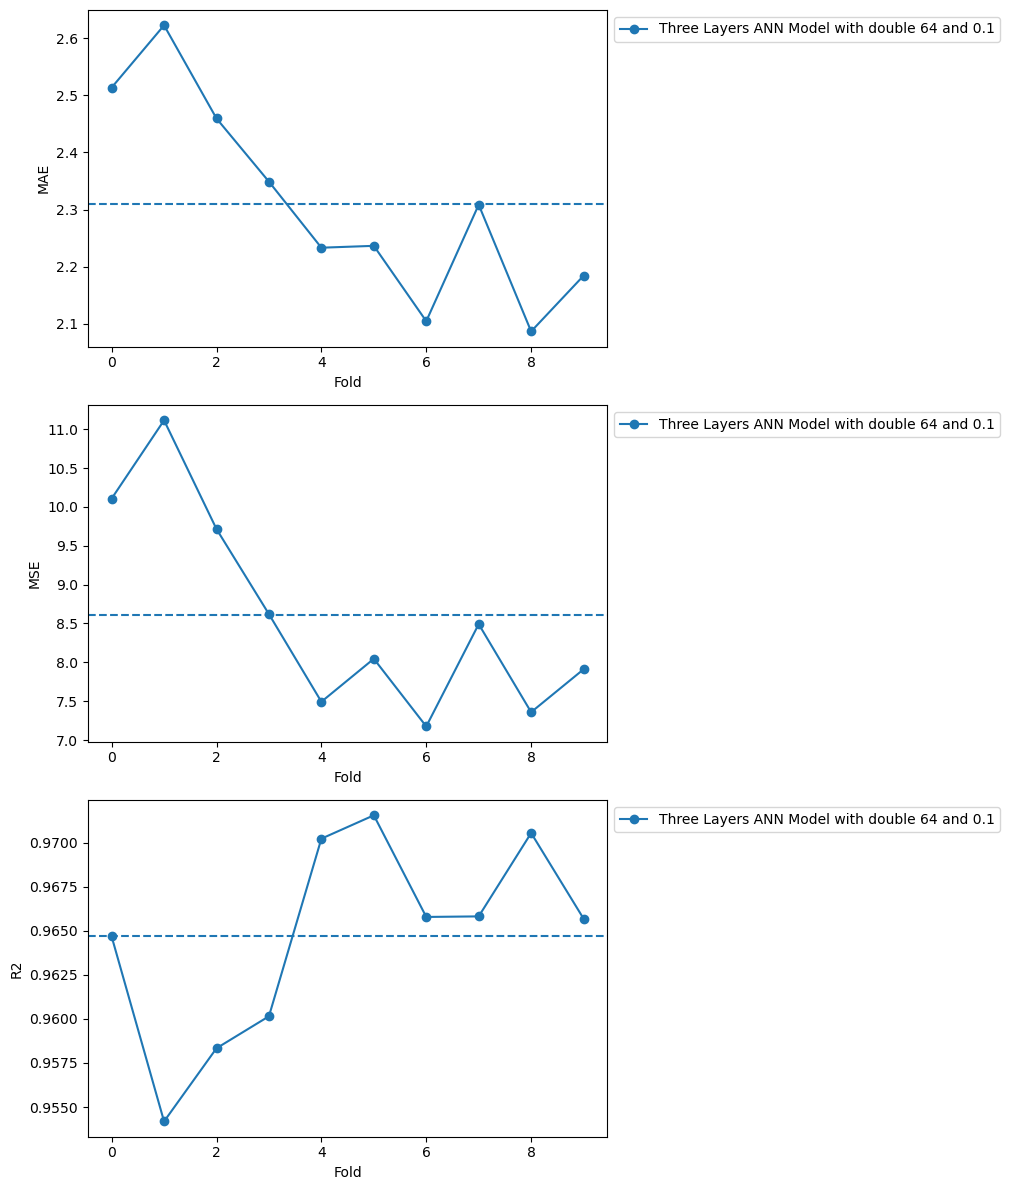

In [83]:
def print_model_scores(model_scores):
    # Plot all scores in one plot with 3 subplots
    plt.figure(figsize=(12, 12))

    # Counter for subplot index
    subplot_index = 1

    for metric in ['MAE', 'MSE', 'R2']:
        plt.subplot(3, 1, subplot_index)

        for model_name, scores_dict in model_scores[metric].items():
            scores = scores_dict['scores']
            mean_score = scores_dict['mean']
            color = plt.gca()._get_lines.get_next_color()  # Get the next available color

            plt.plot(scores, marker='o', label=f'{model_name}', color=color)
            plt.axhline(y=mean_score, linestyle='--', color=color)

        plt.xlabel('Fold')
        plt.ylabel(metric)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
        subplot_index += 1

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to make room for the legend
    plt.show()

print_model_scores(model_scores)

In [84]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

model_scores = cv_eval_model(model, "Four Layers ANN Model with triple 64 and 0.1", model_scores, X_processed, y)

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

model_scores = cv_eval_model(model, "Five Layers ANN Model with quad 64 and 0.1", model_scores, X_processed, y)

13/13 [==============================] - 0s 1ms/step
Four Layers ANN Model with triple 64 and 0.1 (fold 0) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Four Layers ANN Model with triple 64 and 0.1 (fold 1) is done training and evaluation
13/13 [==============================] - 0s 2ms/step
Four Layers ANN Model with triple 64 and 0.1 (fold 2) is done training and evaluation
13/13 [==============================] - 0s 2ms/step
Four Layers ANN Model with triple 64 and 0.1 (fold 3) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Four Layers ANN Model with triple 64 and 0.1 (fold 4) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Four Layers ANN Model with triple 64 and 0.1 (fold 5) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Four Layers ANN Model with triple 64 and 0.1 (fold 6) is done training and evaluation
13/13 [====================

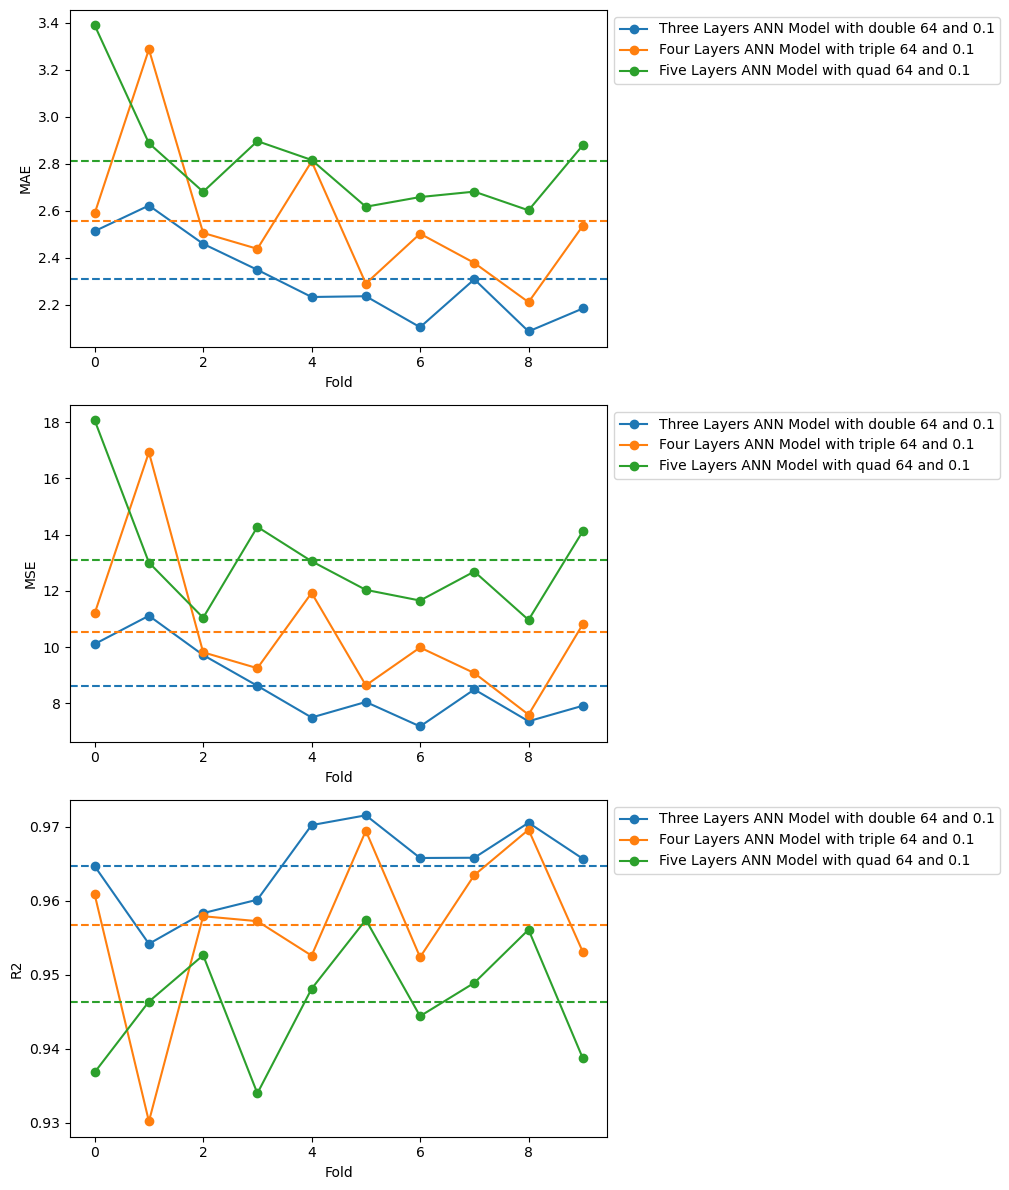

In [85]:
print_model_scores(model_scores)

In [86]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

model_scores = cv_eval_model(model, "Four Layers ANN Model with triple 64 and 0.3", model_scores, X_processed, y)

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

model_scores = cv_eval_model(model, "Five Layers ANN Model with quad 64 and 0.3", model_scores, X_processed, y)

13/13 [==============================] - 0s 1ms/step
Four Layers ANN Model with triple 64 and 0.3 (fold 0) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Four Layers ANN Model with triple 64 and 0.3 (fold 1) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Four Layers ANN Model with triple 64 and 0.3 (fold 2) is done training and evaluation
13/13 [==============================] - 0s 2ms/step
Four Layers ANN Model with triple 64 and 0.3 (fold 3) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Four Layers ANN Model with triple 64 and 0.3 (fold 4) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Four Layers ANN Model with triple 64 and 0.3 (fold 5) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Four Layers ANN Model with triple 64 and 0.3 (fold 6) is done training and evaluation
13/13 [====================

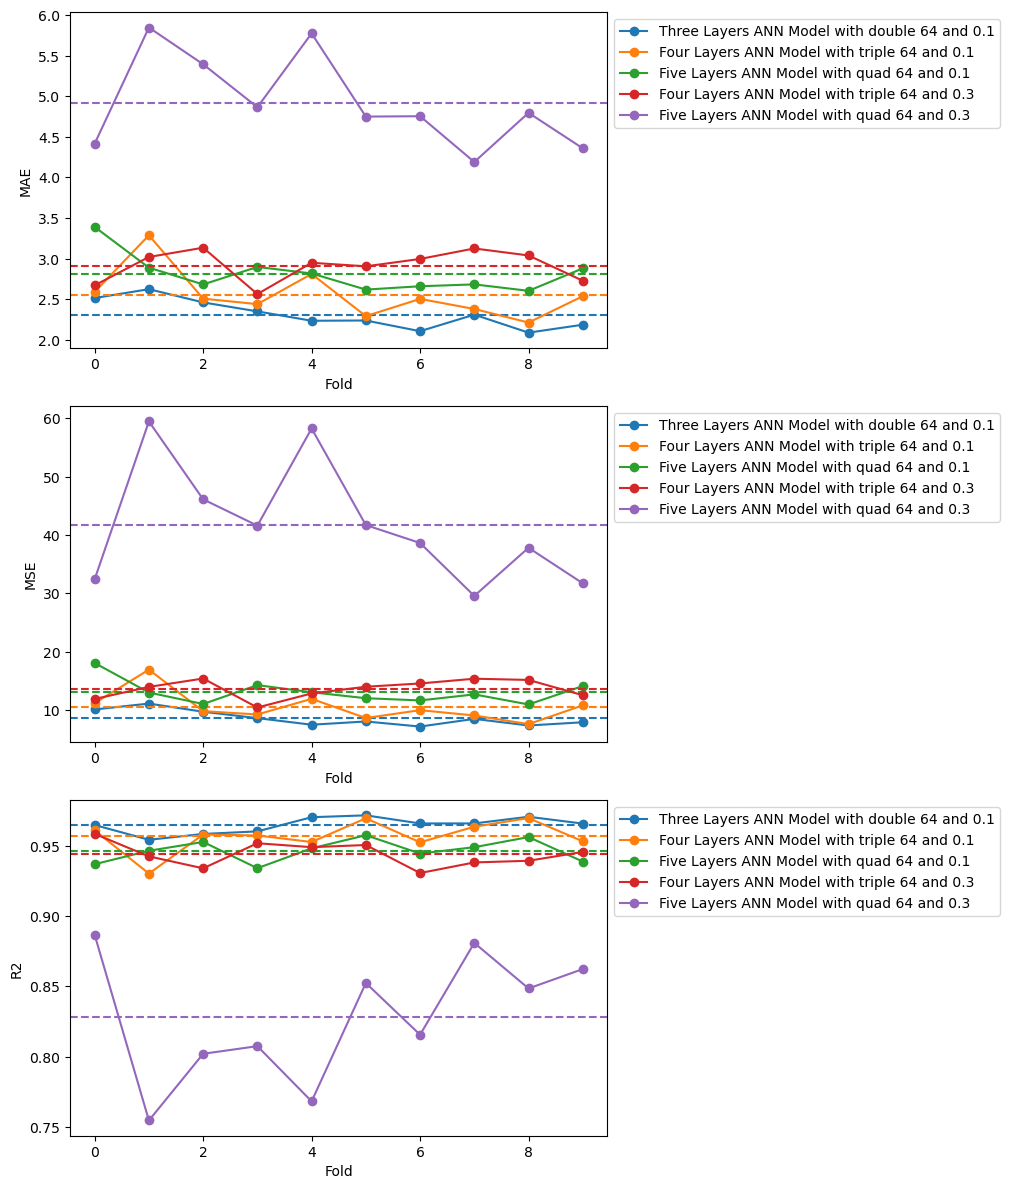

In [87]:
print_model_scores(model_scores)

In [88]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=32, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

model_scores = cv_eval_model(model, "Three Layers ANN Model with single 64 and 0.1", model_scores, X_processed, y)

model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=32, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

model_scores = cv_eval_model(model, "Three Layers ANN Model with 0.1", model_scores, X_processed, y)

13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with single 64 and 0.1 (fold 0) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with single 64 and 0.1 (fold 1) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with single 64 and 0.1 (fold 2) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with single 64 and 0.1 (fold 3) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with single 64 and 0.1 (fold 4) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with single 64 and 0.1 (fold 5) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with single 64 and 0.1 (fold 6) is done training and evaluation
13/13 [=============

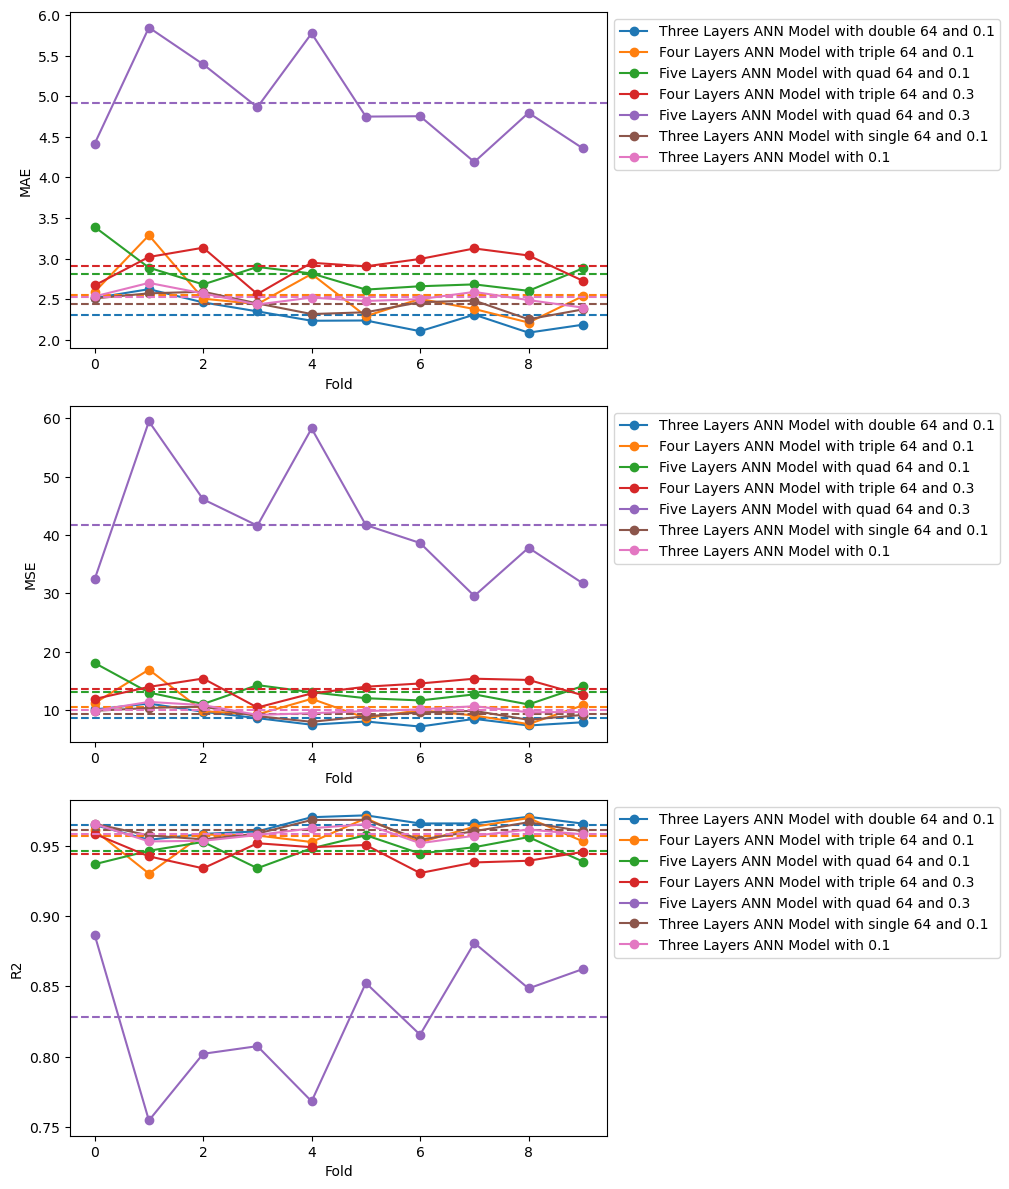

In [89]:
print_model_scores(model_scores)

In [90]:
# Access the mean scores for XGBoost Tuned from model_scores
best_mean_scores = {
    'MAE': model_scores['MAE']["Three Layers ANN Model with double 64 and 0.1"]['mean'],
    'MSE': model_scores['MSE']["Three Layers ANN Model with double 64 and 0.1"]['mean'],
    'R2': model_scores['R2']["Three Layers ANN Model with double 64 and 0.1"]['mean']
}

# Print out the mean scores
print("Mean Scores for best model:")
print("MAE:", best_mean_scores['MAE'])
print("MSE:", best_mean_scores['MSE'])
print("R2:", best_mean_scores['R2'])

Mean Scores for best model:
MAE: 2.309849081554366
MSE: 8.603189126566663
R2: 0.9646915601788869


# Hyperparameter Tuning - Different Optimizers

In [104]:
opt_model_scores = {
    'MAE': {},
    'MSE': {},
    'R2': {}
}

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error')

opt_model_scores = cv_eval_model(model, "Three Layers ANN Model with double 64 and 0.1", opt_model_scores, X_processed, y)

13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (fold 0) is done training and evaluation
13/13 [==============================] - 0s 2ms/step
Three Layers ANN Model with double 64 and 0.1 (fold 1) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (fold 2) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (fold 3) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (fold 4) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (fold 5) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (fold 6) is done training and evaluation
13/13 [=============

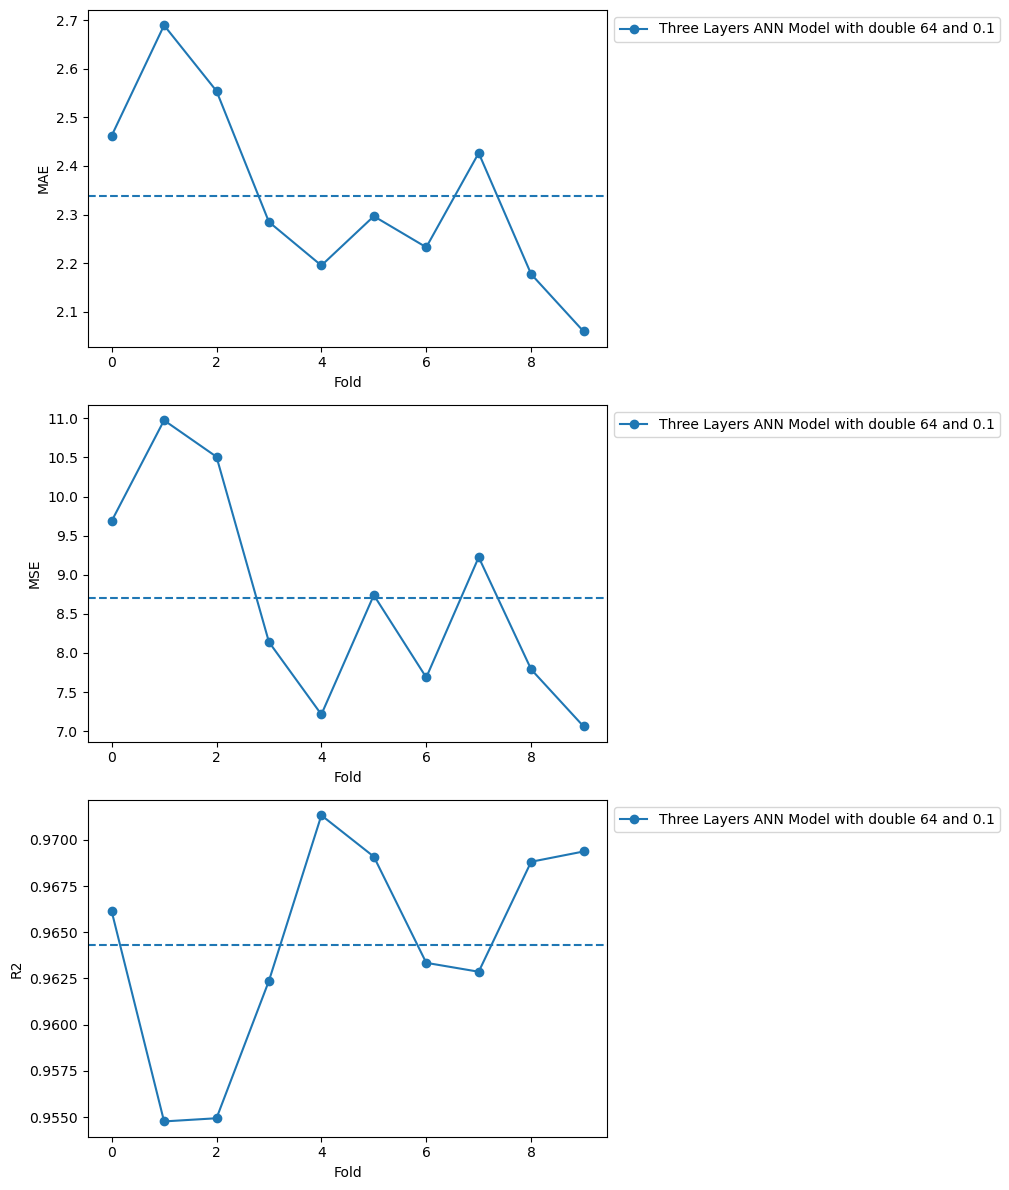

In [105]:
print_model_scores(opt_model_scores)

13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (adagrad) (fold 0) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (adagrad) (fold 1) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (adagrad) (fold 2) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (adagrad) (fold 3) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (adagrad) (fold 4) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (adagrad) (fold 5) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (

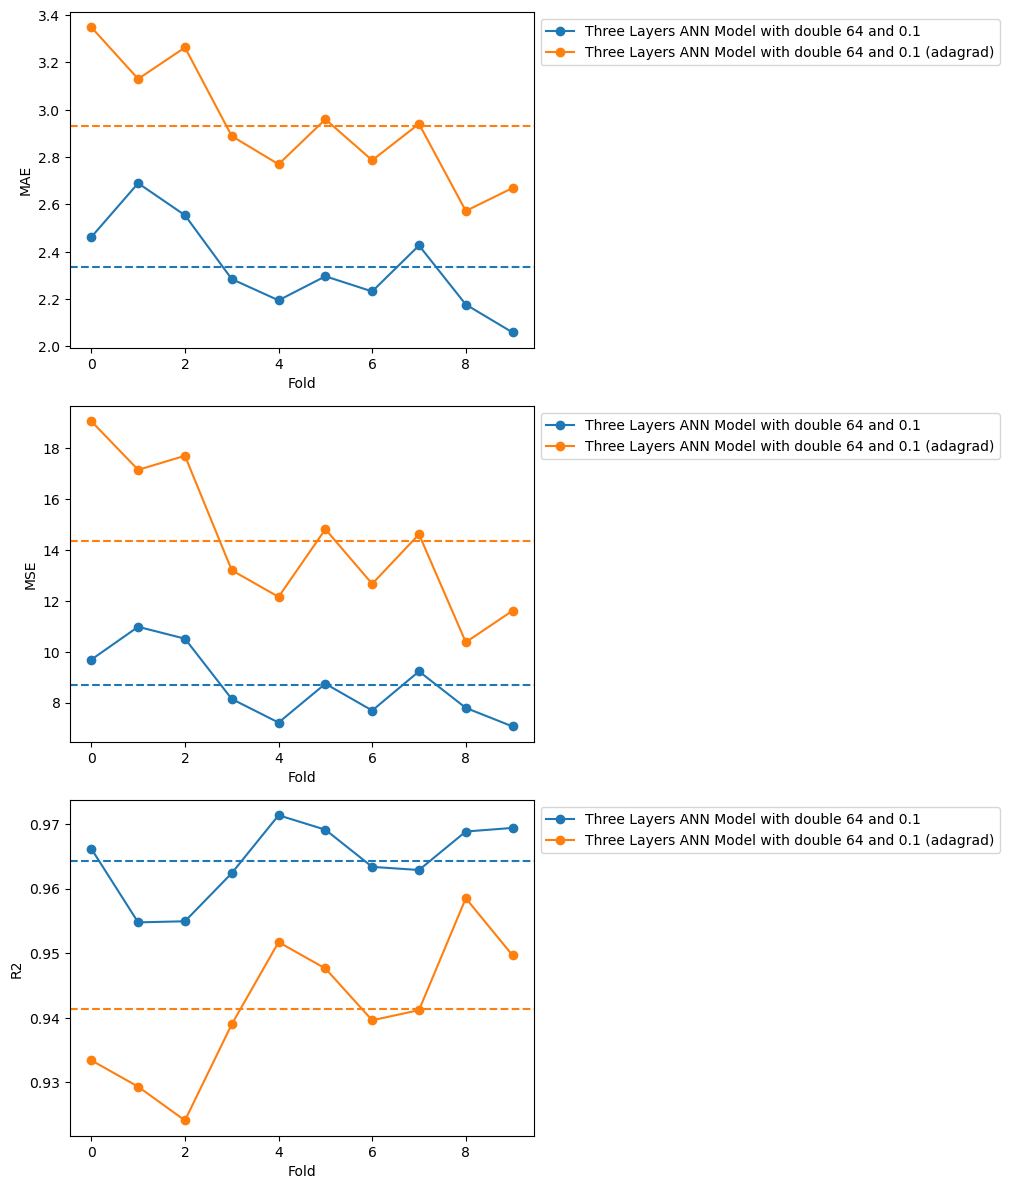

In [106]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adagrad", loss='mean_squared_error')

opt_model_scores = cv_eval_model(model, "Three Layers ANN Model with double 64 and 0.1 (adagrad)", opt_model_scores, X_processed, y)

print_model_scores(opt_model_scores)

In [107]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="rmsprop", loss='mean_squared_error')

opt_model_scores = cv_eval_model(model, "Three Layers ANN Model with double 64 and 0.1 (rmsprop)", opt_model_scores, X_processed, y)

13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (rmsprop) (fold 0) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (rmsprop) (fold 1) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (rmsprop) (fold 2) is done training and evaluation
13/13 [==============================] - 0s 3ms/step
Three Layers ANN Model with double 64 and 0.1 (rmsprop) (fold 3) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (rmsprop) (fold 4) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (rmsprop) (fold 5) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (

13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (ftrl) (fold 0) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (ftrl) (fold 1) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (ftrl) (fold 2) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (ftrl) (fold 3) is done training and evaluation
13/13 [==============================] - 0s 2ms/step
Three Layers ANN Model with double 64 and 0.1 (ftrl) (fold 4) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (ftrl) (fold 5) is done training and evaluation
13/13 [==============================] - 0s 1ms/step
Three Layers ANN Model with double 64 and 0.1 (ftrl) (fold 6) is 

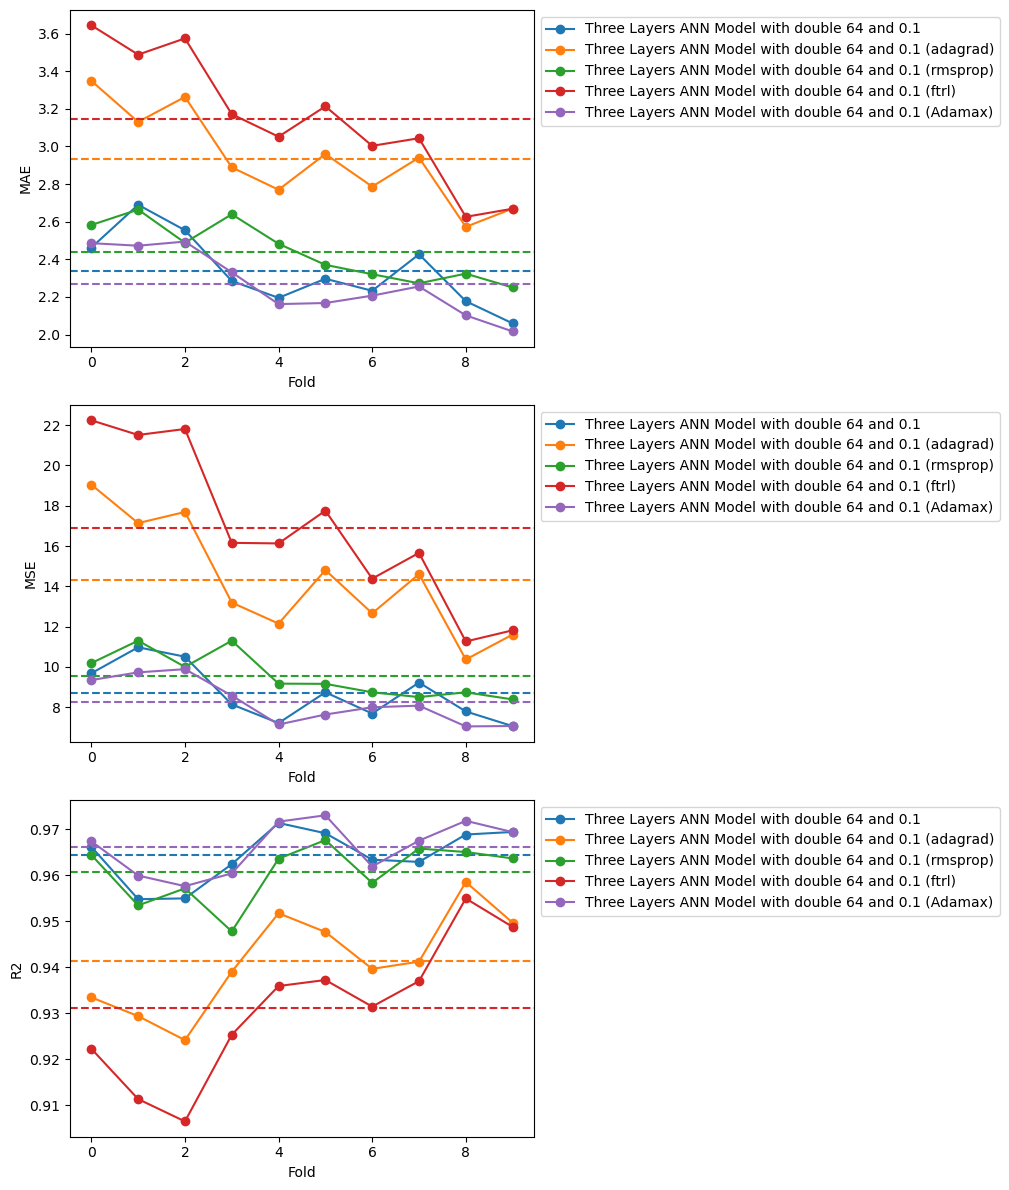

In [108]:
from tensorflow.keras.optimizers import Ftrl


model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer=Ftrl(), loss='mean_squared_error')

opt_model_scores = cv_eval_model(model, "Three Layers ANN Model with double 64 and 0.1 (ftrl)", opt_model_scores, X_processed, y)

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu', input_dim=35))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="Adamax", loss='mean_squared_error')

opt_model_scores = cv_eval_model(model, "Three Layers ANN Model with double 64 and 0.1 (Adamax)", opt_model_scores, X_processed, y)

print_model_scores(opt_model_scores)

In [109]:
# Access the mean scores for XGBoost Tuned from model_scores
best_mean_scores = {
    'MAE': model_scores['MAE']["Three Layers ANN Model with double 64 and 0.1 (Adamax)"]['mean'],
    'MSE': model_scores['MSE']["Three Layers ANN Model with double 64 and 0.1 (Adamax)"]['mean'],
    'R2': model_scores['R2']["Three Layers ANN Model with double 64 and 0.1 (Adamax)"]['mean']
}

# Print out the mean scores
print("Mean Scores for best model:")
print("MAE:", best_mean_scores['MAE'])
print("MSE:", best_mean_scores['MSE'])
print("R2:", best_mean_scores['R2'])

Mean Scores for best model:
MAE: 2.309552471981151
MSE: 8.506713107910992
R2: 0.964974828148136
